## 2.2 Age feature of group with different Care System Conditions
**Important**: From now the data I analysis is not all data from 2018 to 2021, but the period from **5th November 2020 to 6th January 2021**, which is the `Phase four: second national lockdown` and `Phase five: reintroducing a tier system` in [Coronavirus lockdown laws](https://commonslibrary.parliament.uk/research-briefings/cbp-9068/).
### Hypothesis:
- There are some diseases that may have age feature. So depending on the type of disease, the age distribution of users may vary.


/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


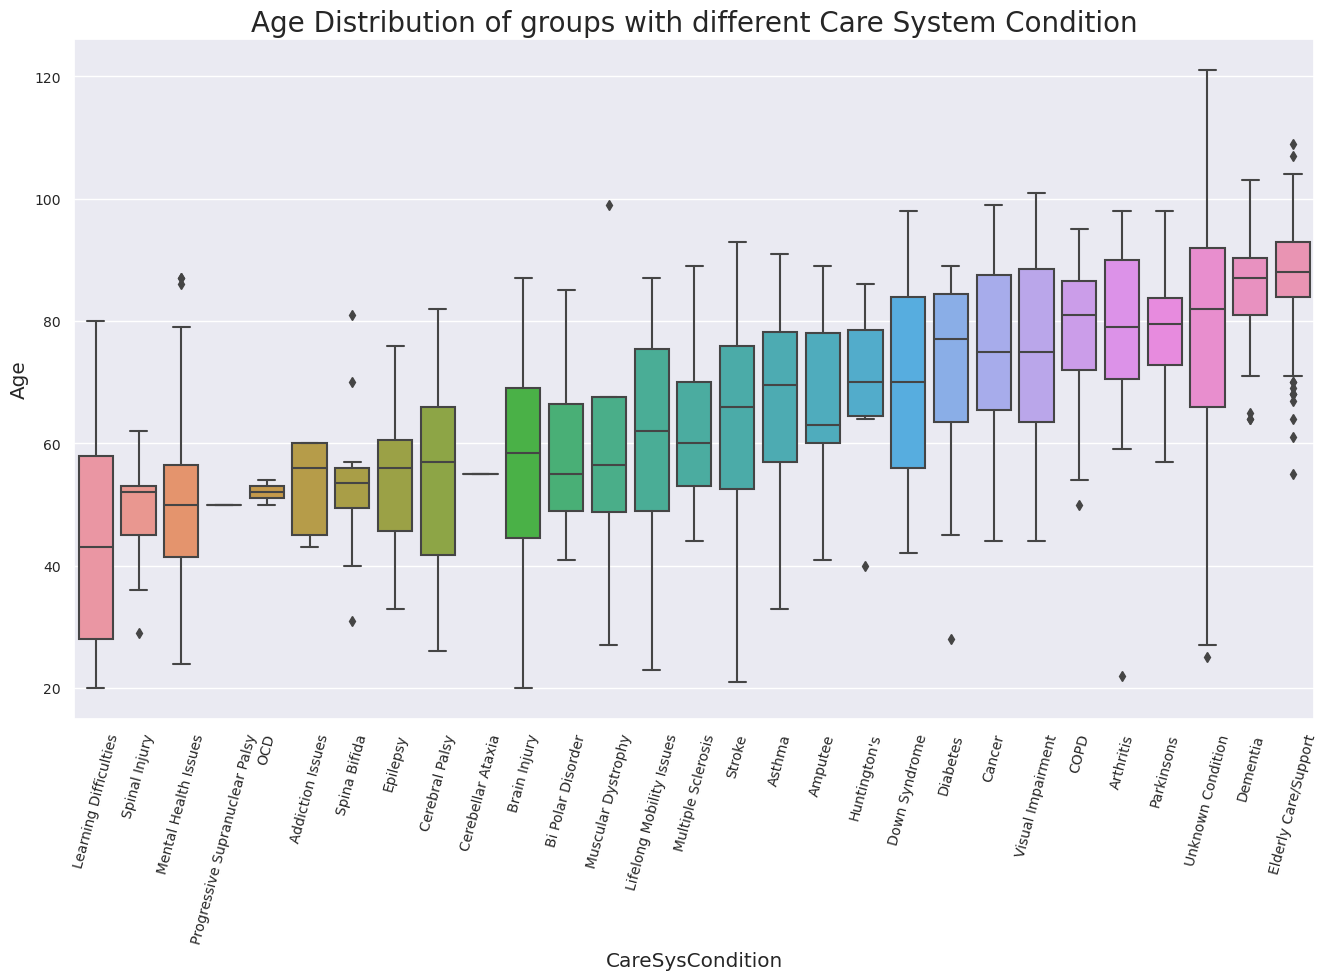

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

CMC_data = pd.read_csv("CustomerMedicalConditions04Nov21.csv")
CC_data = pd.read_csv("CCDate2018-2020.3.23.csv")

# Cleaning data
# Why? -> this is because in medical data, in some cases, multiple rows are repeated for an External ID because there are different StaffPlanConditions for the same External ID.
# So, to analysis the age distribution for different medical conditions, every user(External ID) should only be counted for once.
data_18 = CMC_data.drop(CMC_data.index[CMC_data['Age'] < 18])  
data_18_DOB = data_18.dropna(axis = 0, subset = ["DateOfBirth"] )  
noID_data = data_18_DOB.drop_duplicates(subset=['ExternalID'], keep='first')

# for data in [CareSysCondtions], if they are NaN, change it to 'Unknown Condition' 
noCon_noID_data = noID_data.copy()
Cons_data = noCon_noID_data['CareSysCondition']
CountCon=0

for Cons in Cons_data:
    if pd.isnull(Cons):
        noCon_noID_data.iloc[CountCon,6] = 'Unknown Condition'
    CountCon += 1
    
# Use assertions to make sure the there is no repeating external ID, and all no null value
count = 0
for ID in noCon_noID_data['ExternalID']:
    for other_id in noCon_noID_data['ExternalID'][0:count]:
        assert ID != other_id, "One External ID should not appear more than once!"
    count += 1
for Cons in noCon_noID_data['CareSysCondition']:
    assert Cons != '', "There is still null!"
    
    
# Data being group by CareSysCondition, to explore the age distribution in each group(CareSysCondition)
group_condition = noCon_noID_data.groupby('CareSysCondition')

# to give an order for different'CareSysCondition' by the average age
avg_age = group_condition.agg({'Age':np.mean}).sort_values('Age')

# data visualization
plt.figure(figsize=(16,9),dpi=100)
sns.set(style='darkgrid',font_scale=1.2,palette='pastel')
sns.boxplot(x='CareSysCondition', y='Age', data=noCon_noID_data, order = avg_age.index)
plt.xticks(rotation=75,fontsize=10)
plt.yticks(fontsize=10)
plt.title('Age Distribution of groups with different Care System Condition',fontsize=20)
plt.show()

### Key Fndings:
- Groups with some Care System Condition has Age feature, which means that the Age Distribution of there groups is relatively concentrite, and without extreme Age value.(e.g. Group with Learning Difficulties, Epilepsy, Cerebral Palsy, Parkinsons, Arthritis...)

Notes: This only shows the feature in CleverCogs users, but not the feature of all people with that condition.

## 2.3 Activity Usage of Groups with Different Care System Condition
### Hypothesis:
- Will `Activity Use Times` have correlation with users' `Care System Conditions`?

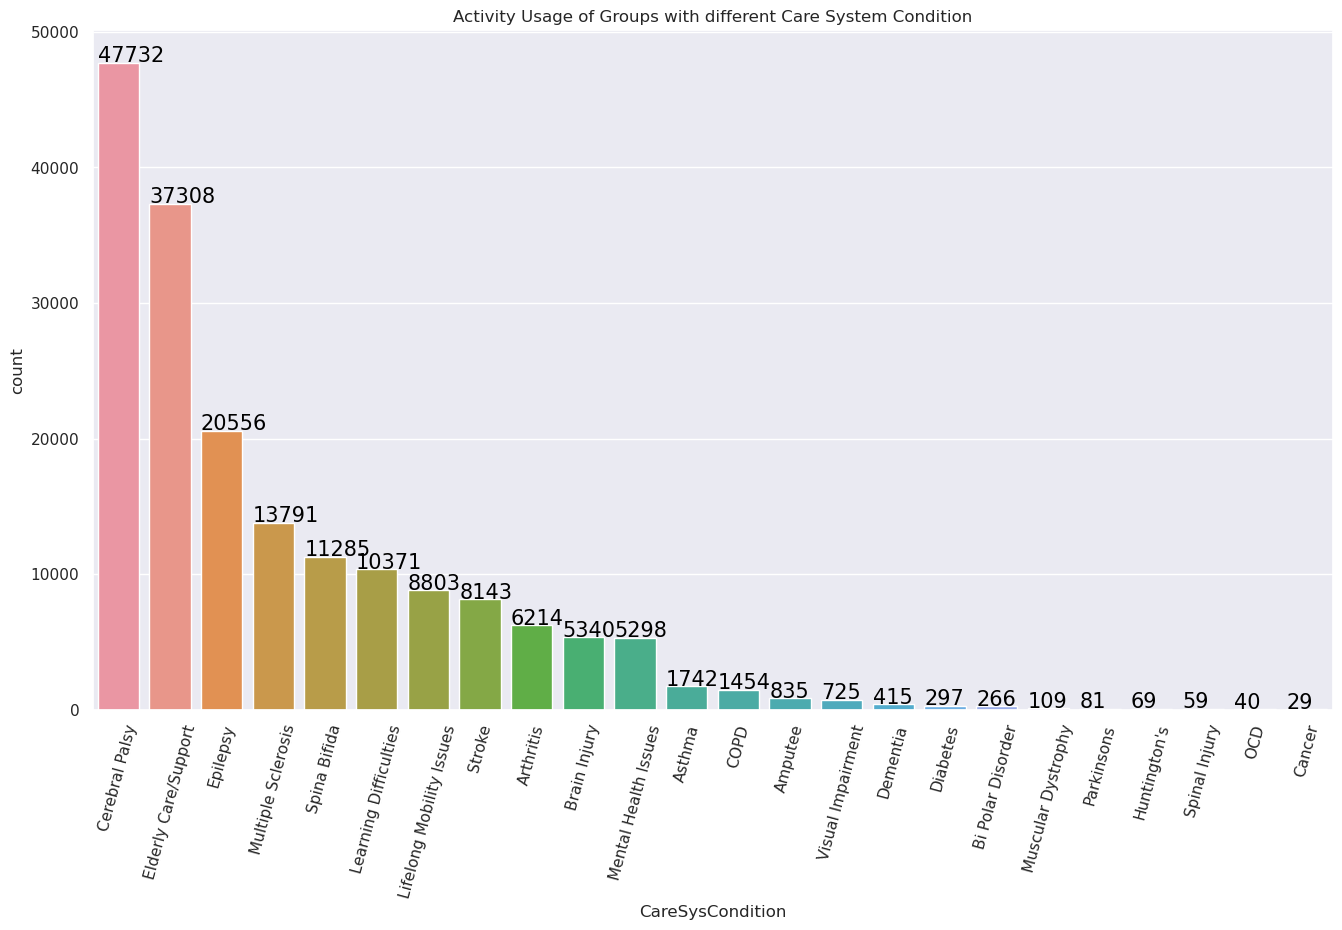

(180962, 15)

In [10]:
# For data cleaning part, the medical condition data should still be no repeat [External ID] and no null [CareSysCondtions]
# So Keep use the noCon_noID_data which has been cleaned.

#Merge data which same External ID
Time_Condition_data = pd.merge(noCon_noID_data, CC_data, on='ExternalID')
# drop group with unknown condition
Time_Condition_data_no_unknown = Time_Condition_data.loc[Time_Condition_data['CareSysCondition']!='Unknown Condition']

# To see the group with which condition contributes more in use Times



sns.set(style='darkgrid',palette='pastel')
fig,ax = plt.subplots(figsize=(16,9), dpi=100)
plt.xticks(rotation=75)
ax.set_title("Activity Usage of Groups with different Care System Condition")

# Use countplot and give an order by count activity use time
sns.countplot(x='CareSysCondition', data=Time_Condition_data_no_unknown, order = Time_Condition_data_no_unknown['CareSysCondition'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+50), color='black', size=15)
plt.show()

np.shape(Time_Condition_data_no_unknown)

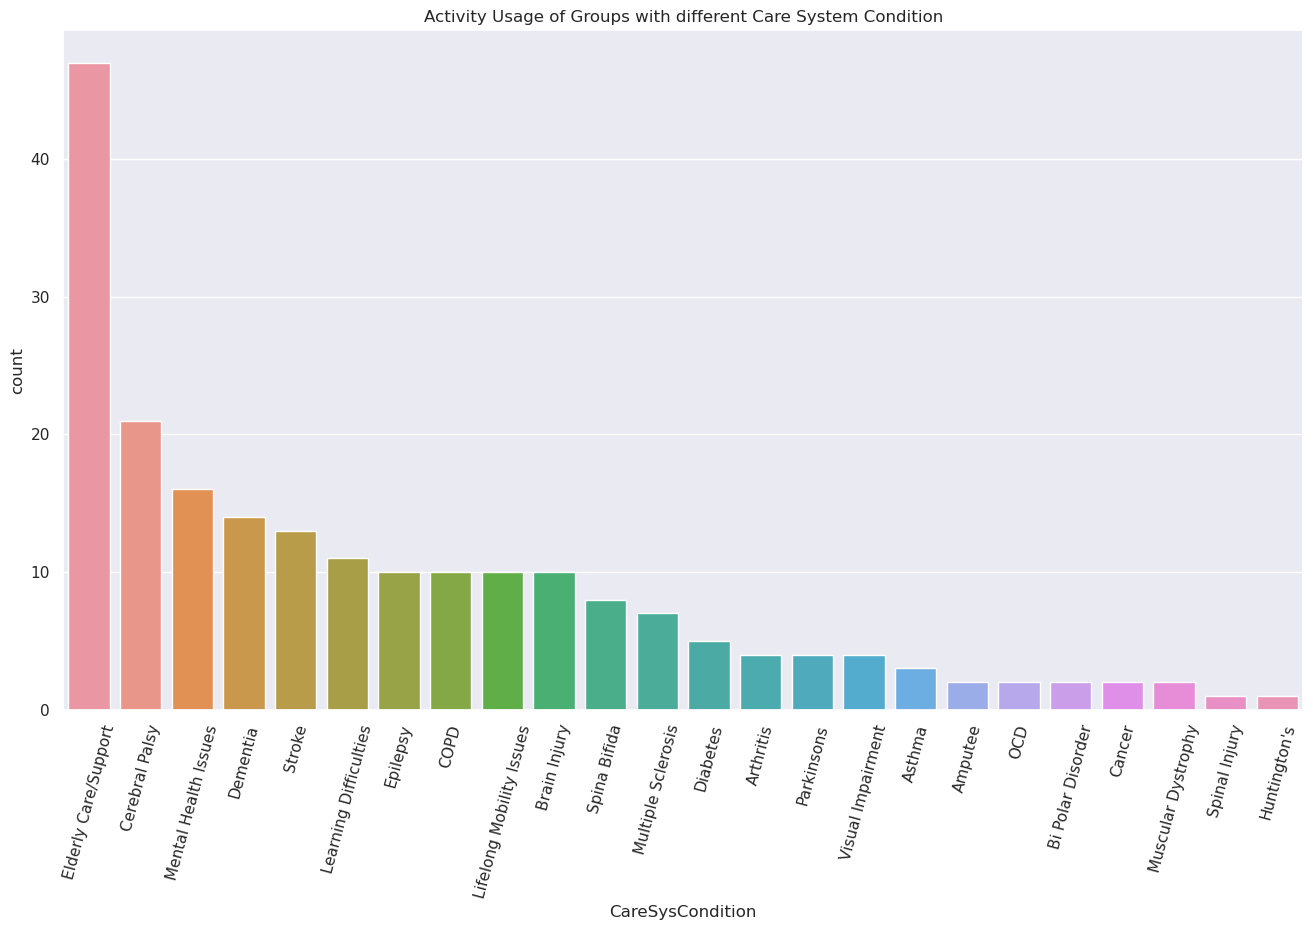

(209, 15)
(47, 15)
(21, 15)
(16, 15)
(14, 15)


In [25]:
# For data cleaning part, the medical condition data should still be no repeat [External ID] and no null [CareSysCondtions]
# So Keep use the noCon_noID_data which has been cleaned.

#Merge data which same External ID
Time_Condition_data = pd.merge(noCon_noID_data, CC_data, on='ExternalID')
# drop group with unknown condition
Time_Condition_data_no_unknown = Time_Condition_data.loc[Time_Condition_data['CareSysCondition']!='Unknown Condition']


Time_Condition_data_no_unknown_no_repeat = Time_Condition_data_no_unknown.drop_duplicates(subset=['ExternalID'], keep='first')


sns.set(style='darkgrid',palette='pastel')
fig,ax = plt.subplots(figsize=(16,9), dpi=100)
plt.xticks(rotation=75)
ax.set_title("Activity Usage of Groups with different Care System Condition")

# Use countplot and give an order by count activity use time
sns.countplot(x='CareSysCondition', data=Time_Condition_data_no_unknown_no_repeat, order = Time_Condition_data_no_unknown_no_repeat['CareSysCondition'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+50), color='black', size=15)
plt.show()


print(np.shape(Time_Condition_data_no_unknown_no_repeat))

ED_DATA = Time_Condition_data_no_unknown_no_repeat.loc[Time_Condition_data_no_unknown_no_repeat['CareSysCondition']=='Elderly Care/Support']
print(np.shape(ED_DATA))

CP_DATA = Time_Condition_data_no_unknown_no_repeat.loc[Time_Condition_data_no_unknown_no_repeat['CareSysCondition']=='Cerebral Palsy']
print(np.shape(CP_DATA))


MHI_DATA = Time_Condition_data_no_unknown_no_repeat.loc[Time_Condition_data_no_unknown_no_repeat['CareSysCondition']=='Mental Health Issues']
print(np.shape(MHI_DATA))

D_DATA = Time_Condition_data_no_unknown_no_repeat.loc[Time_Condition_data_no_unknown_no_repeat['CareSysCondition']=='Dementia']
print(np.shape(D_DATA))


### Key Findings:
- Except group with unknown condition, groups with Cerebral Palsy contributes most in activities usage, then group with arthritis.

Is that only because the total amount of users in these two groups is relatively high?


—> for comparing, I make the figure below to show the Total Number of Users in Group with Different Care System Conditions.

<AxesSubplot:title={'center':'Total Number of Groups with different Care System Condition'}, xlabel='CareSysCondition', ylabel='count'>

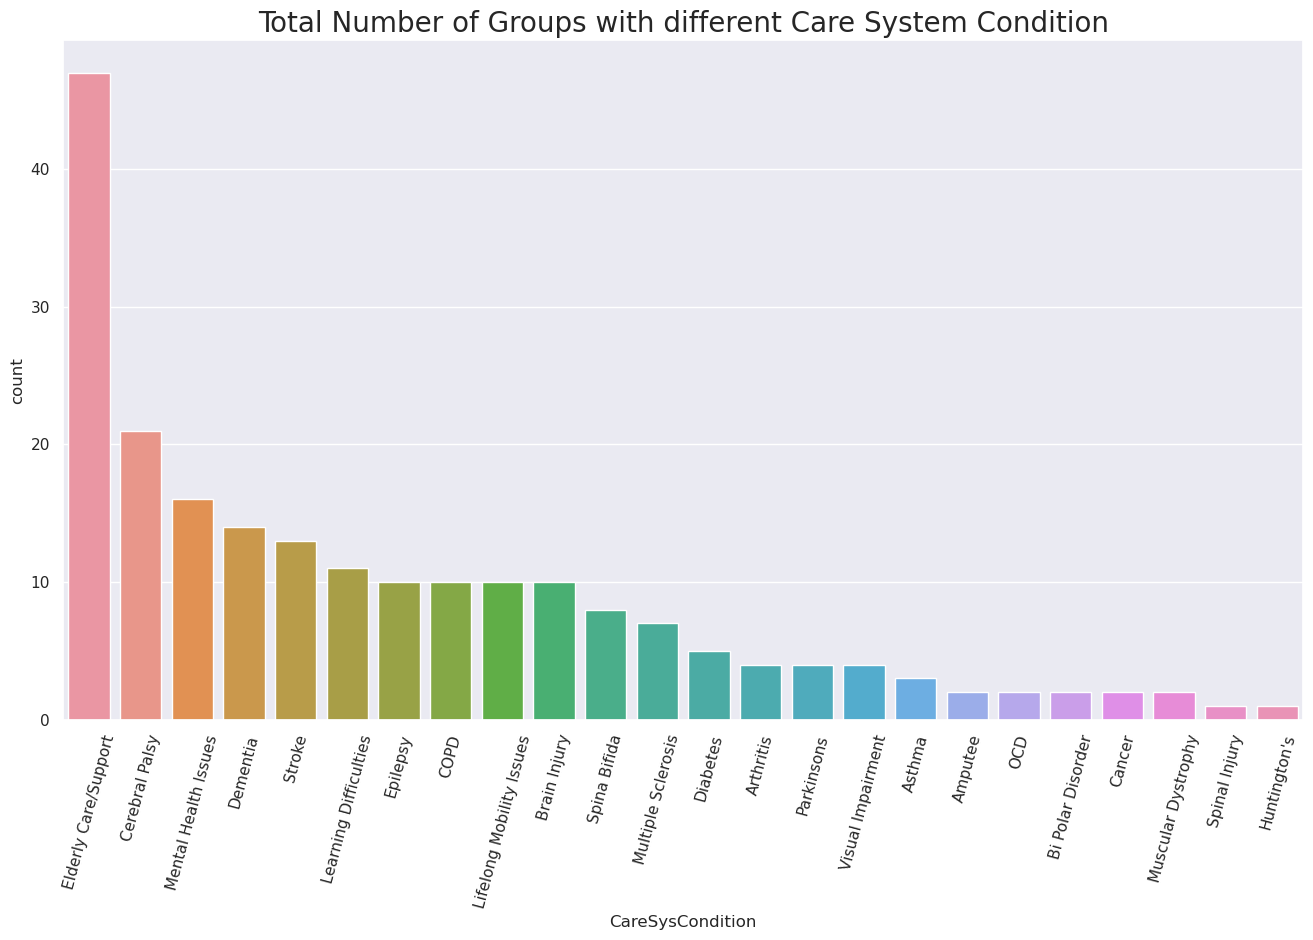

In [19]:
Time_Condition_data = pd.merge(noCon_noID_data, CC_data, on='ExternalID')
# drop group with unknown condition
Time_Condition_data_no_unknown = Time_Condition_data.loc[Time_Condition_data['CareSysCondition']!='Unknown Condition']


Time_Condition_data_no_unknown_no_repeat = Time_Condition_data_no_unknown.drop_duplicates(subset=['ExternalID'], keep='first')


# To see the group with which condition contributes more in use Times
sns.set(style='darkgrid',palette='pastel')
plt.figure(figsize=(16,9),dpi=100)
plt.xticks(rotation=75)
plt.title("Total Number of Groups with different Care System Condition",fontsize=20)

# Use countplot and give an order by count activity use time
sns.countplot(x='CareSysCondition', data=Time_Condition_data_no_unknown_no_repeat, order = Time_Condition_data_no_unknown_no_repeat['CareSysCondition'].value_counts().index)



### Key Findings:
- For group with Cerebral Palsy and Arthritis, they don't have the most amount of users(ranks 4th and 12th), but they contributes most in usage (ranks 1st and 2nd).
- For group with Elderly Care/Support, they have the most amount of users(ranks 1st), but their contribution in usage ranks 10th.

## 2.4 Gender Contribution in Usage of groups with different Care System Conditions
### Hypothesis:
- I want to explore Gender Contribution in Usage of Groups with different CareSysConditon, to see is there any correlation of `Usage`, `Gender` and `CareSysCondition`.


In [ ]:
# The figure above could be directly used by adding [Gender] as hue, to see which gender contributes more.
sns.set(style='darkgrid',font_scale=1.2,palette='pastel')
plt.figure(figsize=(16,9),dpi=100)
plt.xticks(rotation=75)
plt.title("Usage of Groups with different Care System Condition (Classified by Gender)",fontsize=20)
sns.countplot(x='CareSysCondition', data=Time_Condition_data_no_unknown, hue='Gender', order = Time_Condition_data_no_unknown['CareSysCondition'].value_counts().index)

### Key Finding:
- The female with Cerebral palsy significantly contributes more than the male. 
——> I found such an uneven gender contribution ratio in many other groups, such as Group with Epilepsy, Lifelong Mobility Issue, and Arthritis.

However, one thing that should be check is, is that because there are more females with Cerebral palsy than males with Cerebral palsy among users?


So in the next step, I use a Pie Chart to check the `Gender Ratio`(in amount of users) of Groups with different Care System Conditions. 

Also, to see the `Gender Contribution ratio`(in amount of Usage) more clearly, I use an other pie chart to show the Gender Contribution in Activity Usage of group with differnet conditions.

In [ ]:
# group_condition is Data being group by CareSysCondition which has been used before.
# See the structure of group_condition:
for condition, group  in group_condition:
    print(condition) #all data has been group by Condition and divided into several new dataframe
    print(group)

In [ ]:
# Creat Pie chart for Gender Contribution in Usage with different Care System Condition
# with loop
for name,group in Time_Condition_data_no_unknown.groupby('CareSysCondition'):
    count_f = (group.loc[group['Gender'] == 'F']).shape[0]
    count_m = (group.loc[group['Gender'] == 'M']).shape[0]
    count_u = (group.loc[group['Gender'] == 'U']).shape[0]
    gender_name = ['Female','Male','Unknown']
    gender_size_count = [count_f,count_m, count_u]
    plt.figure(figsize=(2,2), dpi=75)
    plt.pie(gender_size_count, labels=gender_name, autopct="%1.2f%%", wedgeprops = {'width' : 0.4})
    plt.legend(bbox_to_anchor = (1,1))
    plt.title("Gender Contribution in Activity Usage of group with " + name, fontsize=10, y=1.08) # Give some space between Title and fig
    plt.axis('equal')
    plt.show()

In [ ]:
# Creat pie chart of Gender for groups with different Care System Condition
# with Loop
for name,group in noCon_noID_data_no_unknown.groupby('CareSysCondition'):
    count_f = (group.loc[group['Gender'] == 'F']).shape[0]
    count_m = (group.loc[group['Gender'] == 'M']).shape[0]
    count_u = (group.loc[group['Gender'] == 'U']).shape[0]
    gender_name = ['Female','Male','Unknown']
    gender_size_count = [count_f,count_m, count_u]
    plt.figure(figsize=(2,2), dpi=75)
    plt.pie(gender_size_count, labels=gender_name, autopct="%1.2f%%", wedgeprops = {'width' : 0.4})
    plt.legend(bbox_to_anchor = (1,1))
    plt.title("Gender Ratio of group with " + name, fontsize=10, y=1.08) # Give some space between Title and fig
    plt.axis('equal')
    plt.show()

### Key Findings:
- Care System Condition will affact the Gender Contribution Ratio in Usage:
    - For group with `Cerebral Palsy`：There is 60.9% Male and 38.1% female in that group; However, the contribution of usage of Male is far over 60.9%, which is 94.58%. -> This shows that in group with Cerebral Palsy, the average contribution of each male is more than female's.

    - For group with `Arthritis`：There is 30.43% Male and 69.57% female in that group; However, the contribution of usage of female is 74.24%, and that of male is 25.73. -> This shows that in group with Arthritis, the female is actively contributed in usage while males never contributed.

    - For group with `Brain Injury`：There is 58.82% Male and 38.24% female in that group; The contribution of usage of female is 100%. -> This shows that in group with Brain Injury, the female and male motivation of usage contributino is nearly the same level. 

    - for group with ……

## 2.5 Group (with different Care System Condition)'s Contribution in 'Care'-related Activities
### Hypothesis:
- Users with what `CareSysConditon` click more on `LinkTitle` `with the keyword 'Care'`? （which might refer to a greater concern for one's CARE situation）

In [ ]:
Care_data = Time_Condition_data_no_unknown.loc[(Time_Condition_data['LinkTitle']=='My Care')| (Time_Condition_data['LinkTitle']=='My Care Team') |(Time_Condition_data['LinkTitle']== 'Care Website')]


sns.set(style='darkgrid',palette='pastel')
plt.figure(figsize=(16,9),dpi=100)
plt.xticks(rotation=75)
plt.title("Usage(Care-related) Contribution of Groups with Differnet CareSysCondition",fontsize=20)
# Use countplot and give an order by count activity use time
sns.countplot(x='CareSysCondition', data=Care_data, order = Care_data['CareSysCondition'].value_counts().index)

In [ ]:
Care_data = Time_Condition_data_no_unknown.loc[(Time_Condition_data['LinkTitle']=='Blackwood COVID-19 Letter')| (Time_Condition_data['LinkTitle']=='COVID-19 Aberdeen') |(Time_Condition_data['LinkTitle']== 'COVID-19 Dundee')|(Time_Condition_data['LinkTitle']== 'COVID-19 Info - Aberdeen Local Links')|(Time_Condition_data['LinkTitle']== 'COVID-19 Info - Dundee Local Links')|(Time_Condition_data['LinkTitle']== 'COVID-19 Information')]

sns.set(style='darkgrid',palette='pastel')
plt.figure(figsize=(16,9),dpi=100)
plt.xticks(rotation=75)
plt.title("Usage(Covid_related) Contribution of Groups with Differnet CareSysCondition ",fontsize=20)
# Use countplot and give an order by count activity use time
sns.countplot(x='CareSysCondition', data=Care_data, order = Care_data['CareSysCondition'].value_counts().index)

### Key finding:
- It shows that group with `arthritis` contributes an overwhelming number of `'Care'-related usage`. To makes sure it is not only because that group with arthritis contribute most on `the total usage`, I use the figure below to show the total usage contribution grouped by CareSysCondition.

In [ ]:
sns.set(style='darkgrid',palette='pastel')
plt.figure(figsize=(16,9),dpi=100)
plt.xticks(rotation=75)
plt.title("Usage(Total) Contribution of Groups with different differnet CareSysCondition",fontsize=20)
# Use countplot and give an order by count activity use time
sns.countplot(x='CareSysCondition', data=Time_Condition_data_no_unknown, order = Time_Condition_data_no_unknown['CareSysCondition'].value_counts().index)

### Key Findings:
- Group with `Arthritis` clicks most on `LinkTitle` `with the keyword 'Care'`, which contributes an overwhelming Usage of `Care`-related activity. 
- Group with `Cerebral Palsy` has a very similar level of `Total usage` with Group with `Arthritis`, but its contribution in `Care`-related activity usage is much more less than Group with `Arthritis`.
- It might because that the `function` in Care-related activity is more suitable for or it originally target at users with `Arthritis` than users with `Cerebral Palsy`.

### Potential Uses of Code:
This code will also equally work well by changing the Keyword `'Care'`.
For example, change it to `'Covid'`, so we could find users with what condition concerns more about Covid.

## 2.6 Age feature in Activities (in `'Category'` `Link Type`)
### Hypothesis:
- Different `Age` users might have different activity preferences.

In [ ]:
Category_data = Time_Condition_data.loc[Time_Condition_data['LinkType']=='Category']

# Data being group by CareSysCondition, to explore the age distribution in each group(CareSysCondition)
group_LinkTitle = Category_data.groupby('LinkTitle')

# to give an order for different'CareSysCondition' by the average age
avg_age_forLinkTitle = group_LinkTitle.agg({'Age':np.mean}).sort_values('Age')

plt.figure(figsize=(16,9),dpi=200)
sns.set(style='darkgrid',font_scale=0.8,palette='pastel')
sns.boxplot(x='LinkTitle', y='Age', data=Category_data, order = avg_age_forLinkTitle.index)
plt.xticks(rotation=75,fontsize=8)
plt.yticks(fontsize=10)
plt.title('Age distribution for Activities',fontsize=20)
plt.show()

**Key findings:**
* Some Activities has Age feature, which means that the Age Distribution of those activities is relatively concentrite, and without extreme Age value.(e.g. Digital Skills, Covid Information and Covid Dundee...)
* `All` clicking relates to `Covid` are on the far right of x axis of this figure:
    * The x axis is sort by the average age of each group —— old people(between 60 and 85) concers more about Covid.
    * No exterme value over 100 or less than 50 in Covid-related clicking —— Younger or older people are not very concerned about covid(at least in CleverCogs)